In [ ]:
!unzip parsed_patient_data.zip

Archive:  parsed_patient_data.zip
  inflating: parsed_patient_data.csv  


Meaningful features based on Pearson correlation:
Index([], dtype='object')

Meaningful features based on Spearman's rank correlation:
Index([], dtype='object')

Meaningful features based on Kendall's tau correlation:
Index([], dtype='object')


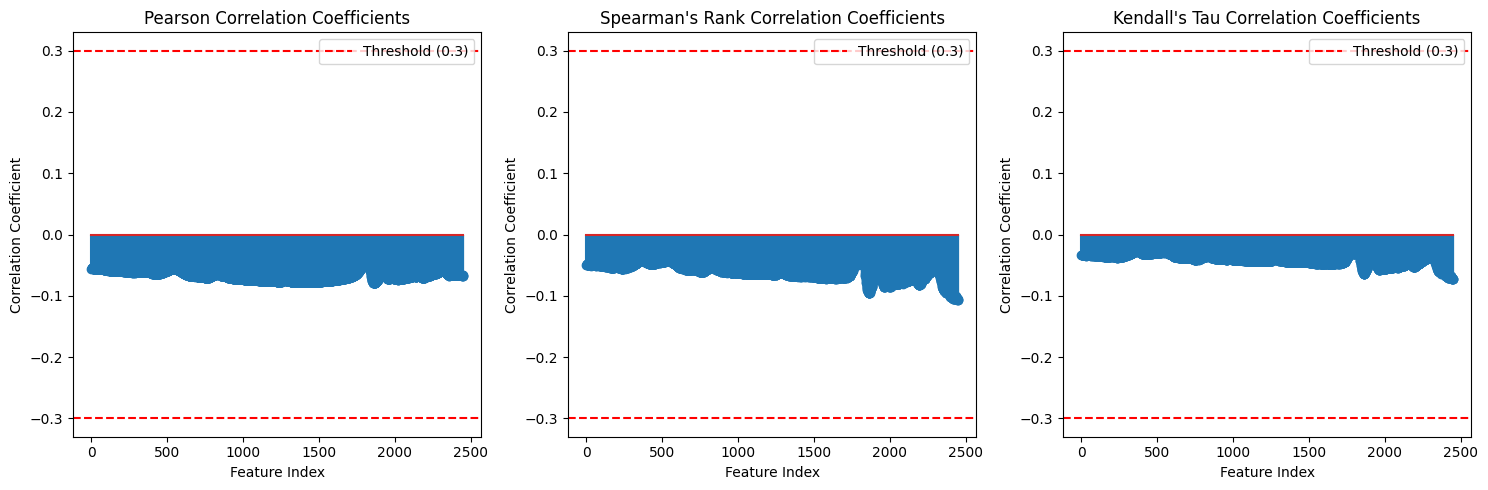

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv("parsed_patient_data.csv")
y = df["0"]
X = df.drop("0", axis=1)

# Calculate Pearson correlation coefficients and p-values
pearson_corr = []
pearson_pvalues = []
for column in X.columns:
    corr, pvalue = stats.pearsonr(X[column], y)
    pearson_corr.append(corr)
    pearson_pvalues.append(pvalue)

# Calculate Spearman's rank correlation coefficients and p-values
spearman_corr = []
spearman_pvalues = []
for column in X.columns:
    corr, pvalue = stats.spearmanr(X[column], y)
    spearman_corr.append(corr)
    spearman_pvalues.append(pvalue)

# Calculate Kendall's tau correlation coefficients and p-values
kendall_corr = []
kendall_pvalues = []
for column in X.columns:
    corr, pvalue = stats.kendalltau(X[column], y)
    kendall_corr.append(corr)
    kendall_pvalues.append(pvalue)

# Set adjusted thresholds
sig_threshold = 0.1
corr_threshold = 0.3

# Identify meaningful features based on statistical significance and correlation magnitude
meaningful_features_pearson = np.where((np.abs(pearson_corr) > corr_threshold) & (np.array(pearson_pvalues) < sig_threshold))[0]
meaningful_features_spearman = np.where((np.abs(spearman_corr) > corr_threshold) & (np.array(spearman_pvalues) < sig_threshold))[0]
meaningful_features_kendall = np.where((np.abs(kendall_corr) > corr_threshold) & (np.array(kendall_pvalues) < sig_threshold))[0]

# Print the meaningful features
print("Meaningful features based on Pearson correlation:")
print(X.columns[meaningful_features_pearson])
print("\nMeaningful features based on Spearman's rank correlation:")
print(X.columns[meaningful_features_spearman])
print("\nMeaningful features based on Kendall's tau correlation:")
print(X.columns[meaningful_features_kendall])

# Visualize the correlation coefficients
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.stem(pearson_corr)
ax1.set_title("Pearson Correlation Coefficients")
ax1.set_xlabel("Feature Index")
ax1.set_ylabel("Correlation Coefficient")
ax1.axhline(corr_threshold, color='r', linestyle='--', label=f"Threshold ({corr_threshold})")
ax1.axhline(-corr_threshold, color='r', linestyle='--')
ax1.legend()

ax2.stem(spearman_corr)
ax2.set_title("Spearman's Rank Correlation Coefficients")
ax2.set_xlabel("Feature Index")
ax2.set_ylabel("Correlation Coefficient")
ax2.axhline(corr_threshold, color='r', linestyle='--', label=f"Threshold ({corr_threshold})")
ax2.axhline(-corr_threshold, color='r', linestyle='--')
ax2.legend()

ax3.stem(kendall_corr)
ax3.set_title("Kendall's Tau Correlation Coefficients")
ax3.set_xlabel("Feature Index")
ax3.set_ylabel("Correlation Coefficient")
ax3.axhline(corr_threshold, color='r', linestyle='--', label=f"Threshold ({corr_threshold})")
ax3.axhline(-corr_threshold, color='r', linestyle='--')
ax3.legend()

plt.tight_layout()
plt.show()